# Feature Engineering
Extracting more information from exisiting data.


# It has ypes:
## A) Feature preprocessing( It implies  updating and transforming the existing features.)
    For Continous variables
    *1. Feature Transformation
    *2. Feature Scaling
        * 2.1 MinMaxscaler
        * 2.2 StandardScaler
        
     For Categorical variables
     *3 Feature encoding
        * 3.1 OHE
        * 3.2 Label Encoding
        * 3.3 Combining sparse classes
        
        
## B) Feature geneation(Creating new features from existing data.)
     * B.1 Binning 
     * B.2 Feature Intraction
     * B.3 Missing Values
     * B.4 Frequency encoding
     * B.5 Date Time Features
     
## C) Feature Seletion

##### Removing irrelevant or redundant features to improve model performance.
##### Techniques include filter methods, wrapper methods, and embedded methods.
    * C.1 Filter Methods
    * C.2 Wrapper Methods
    * C.3 Embeded Methods
    

## D) Dimensionality Reduction Techniques

    * D.1 Percentage Missing values
    * D.2 Amount of Variation
    * D.3 Pairwise Correlations
    * D.4 Multicolinearity
    * D.5 PCA, LDA and t-SNE
    * D.6 Cluster Anlaysis
    * D.7 Correlation with the Target
    * D.8-10 PCA, LDA and t-SNE
    * D.11 LASSO (Least Absolute Shrinkage and Selection Operator)
    * D.12 Tree-based

In [2]:
# Loading the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bigmart=pd.read_csv("E:\DS_ACADEMIC\DataSets\Big Mart\Train.csv")
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# A) Feature Preprocessing
## A1) Feature Transformation
Item visibilty Distribution

<Axes: >

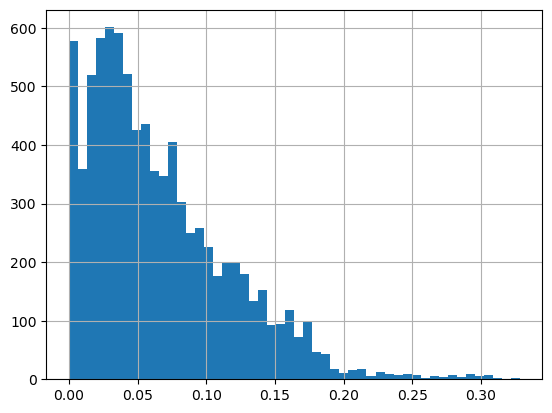

In [5]:
bigmart['Item_Visibility'].hist(bins=50)

# It is a right skewed. In this case we can take the root or apply log function.
### A right-skewed distribution, also known as a positively skewed distribution, is a type of distribution in statistics where the tail on the right side (the larger values) is longer or fatter than the left side (the smaller values). In other words, the majority of the data points cluster to the left, and there are relatively fewer data points on the right side, resulting in a distribution that is "skewed" to the right.

In a right-skewed distribution:

* The mean is typically greater than the median.
* The mode is usually less than the median.
* The tail of the distribution extends to the right.
Imagine a histogram or a line graph representing the distribution of values, and you'll see that the right tail is longer than the left one. This type of distribution is also sometimes called "positively skewed" because the right side is positively extended.

Real-world examples of right-skewed distributions include income distribution (where a few individuals or households have very high incomes), exam scores (where a few students score exceptionally high), and many financial metrics. Understanding the skewness of a distribution is essential for statistical analysis and interpretation of data.

In [7]:
# Using square root
item_Visibility_squareroot= np.sqrt(bigmart['Item_Visibility'])

<Axes: >

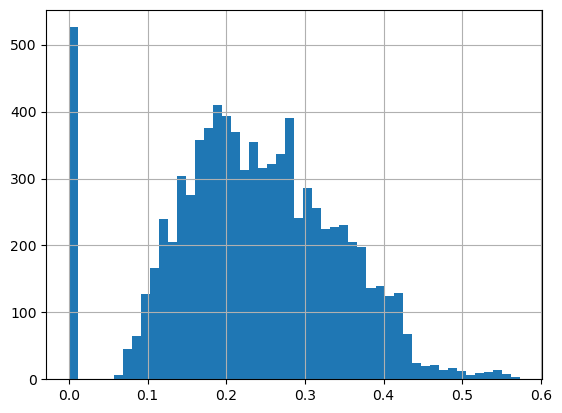

In [8]:
item_Visibility_squareroot.hist(bins=50)

# The resultant is normaly distributed.

In [9]:
# Let's use logfunction
item_Visibility_log= np.log(bigmart['Item_Visibility'])

C:\Users\viren\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
bigmart['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

### The minimum value we have is zero (divide by zero encountered in log(0) that is not defined). So we need to add 0.1 to each value then take log.

In [17]:
item_Visibility_log=np.log(bigmart['Item_Visibility']+0.1)

<Axes: >

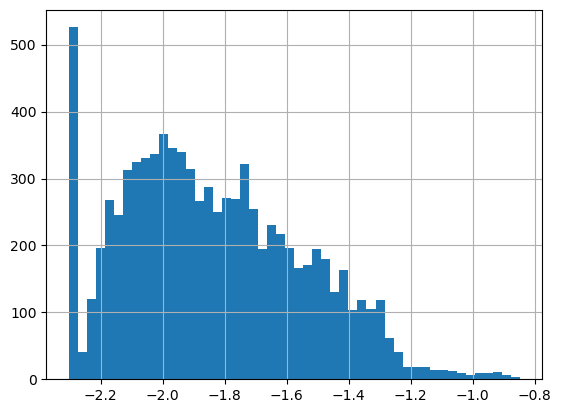

In [19]:
item_Visibility_log.hist(bins=50)

### Here we get the visibility in neagtives. This is beacuse the values in the columns are less then 1. Lets increase the scale will not affect the distributuion at all. 

<Axes: >

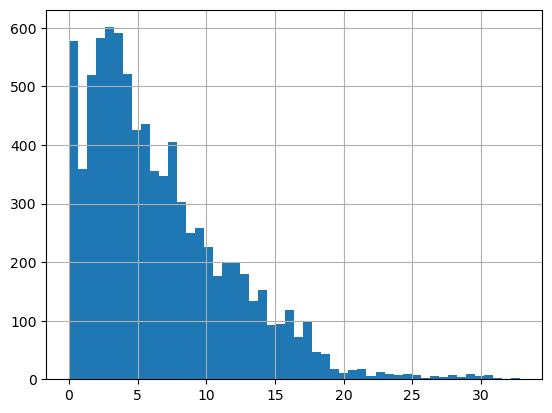

In [20]:
Visibility=bigmart['Item_Visibility']*100
Visibility.hist(bins=50)

In [22]:
# Now taking the log
visibility_log=np.log(Visibility+1)

<Axes: >

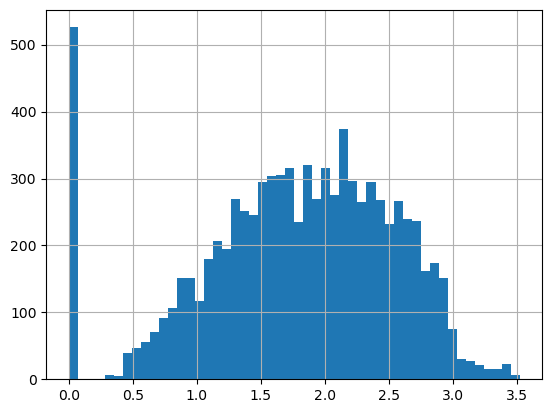

In [24]:
visibility_log.hist(bins=50)

### * Now we can see the distribution is symmetric and also values are postive.

# A) Feature Preprocessing
## A2) Feature Scaling
Scale down a feture strictly to [0,1]
* Xi'=(Xi-min(X))/(max(X)-min(X))
#### min(X) and max(X) represent the minimum and maximum values.

In [26]:
data=bigmart[['Item_Visibility', 'Item_MRP']]
data.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


### A2.1)  Min Max Scaler (Feature Scaling)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


In [30]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8523.000000,8523.000000
mean,0.201382,0.465635
std,0.157123,0.264327
min,0.000000,0.000000
25%,0.082187,0.265437
50%,0.164228,0.474209
75%,0.288026,0.655156
max,1.000000,1.000000


### A2.2) Standrad Scaler (Feature Scaling)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
std_scaler=StandardScaler()
scaled_data=std_scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,-0.970732,1.747454
1,-0.908111,-1.489023
2,-0.956917,0.010040
3,-1.281758,0.660050
4,-1.281758,-1.399220


In [33]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8.523000e+03,8.523000e+03
mean,-1.092117e-16,-1.579818e-16
std,1.000059e+00,1.000059e+00
min,-1.281758e+00,-1.761688e+00
25%,-7.586531e-01,-7.574307e-01
50%,-2.364792e-01,3.243893e-02
75%,5.514755e-01,7.170372e-01
max,5.083050e+00,2.021724e+00


In [35]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Visibility  8523 non-null   float64
 1   Item_MRP         8523 non-null   float64
dtypes: float64(2)
memory usage: 133.3 KB


# A) Feature Preprocessing
## A3) Feature Encoding 
for categorical data

### A3.1) OHE(One_Hot Encoding) or Dummy Encoding

In [36]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [38]:
bigmart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [41]:
bigmart.shape

(8523, 12)

In [42]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Many variables are categorical with the datatype 'object'. We need to convert these into numbers. We will use OHE here.

In [44]:
bigmart['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [40]:
bigmart['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [43]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False


### Doing it for all variables:

In [45]:
bigmart_encoded=pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


## Problem with OHE
### Problem 1
The order between these variables  is destroyed. As a result we are missing out on some information.

In [47]:
bigmart_encoded[['Outlet_Size_High','Outlet_Size_Medium','Outlet_Size_Small']]

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,False,True,False
1,False,True,False
2,False,True,False
3,False,False,False
4,True,False,False
...,...,...,...
8518,True,False,False
8519,False,False,False
8520,False,False,True
8521,False,True,False


### Problem 2 
Numbers of features has incresed from 12 to 1600, where sparsity is present.

In [48]:
bigmart_encoded.shape

(8523, 1605)

### A3.2) LabelEncoder
### Problem 1 Solution


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
bigmart['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [51]:
le=LabelEncoder()
le.fit_transform(['Small','Medium','High'])

array([2, 1, 0], dtype=int64)

Label Encoder uses the alphabetical order.

In [52]:
bigmart['Outlet_Size']= bigmart['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

### Solution Problem 2
### A3.3) LabelEncoder Combine Sparse Class(Deals with high cardinality)

In [66]:
bigmart.nunique()

Item_Identifier              1403
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Item_Identifier_count          10
dtype: int64

In [56]:
bigmart['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [57]:
temp=bigmart['Item_Identifier'].value_counts()
temp.head()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
Name: count, dtype: int64

In [58]:
bigmart['Item_Identifier_count']=bigmart['Item_Identifier'].apply(lambda x: temp[x])
bigmart[['Item_Identifier','Item_Identifier_count']].head()

,Item_Identifier,Item_Identifier_count
0,FDA15,8
1,DRC01,6
2,FDN15,7
3,FDX07,6
4,NCD19,6


In [59]:
for i in range(0, len(bigmart)):
    if bigmart['Item_Identifier_count'][i]<4:
        bigmart['Item_Identifier'][i]='other'

C:\Users\viren\AppData\Local\Temp\ipykernel_26636\4230108673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmart['Item_Identifier'][i]='other'
C:\Users\viren\AppData\Local\Temp\ipykernel_26636\4230108673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmart['Item_Identifier'][i]='other'
C:\Users\viren\AppData\Local\Temp\ipykernel_26636\4230108673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmart['Item_Identifier

In [65]:
 bigmart.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_count
3650,FDR11,10.50,Regular,0.142420,Breads,161.1578,OUT013,1987,2.0,Tier 3,Supermarket Type1,1765.0358,4
4529,FDX08,12.85,Low Fat,0.022696,Fruits and Vegetables,179.9318,OUT018,2009,1.0,Tier 3,Supermarket Type2,2706.4770,5
1332,NCM43,14.50,Low Fat,0.019555,Others,162.4210,OUT018,2009,1.0,Tier 3,Supermarket Type2,1957.4520,7
1260,FDX02,16.00,Low Fat,0.057013,Dairy,225.0404,OUT013,1987,2.0,Tier 3,Supermarket Type1,5851.0504,4
458,DRB48,NaN,Regular,0.024733,Soft Drinks,40.2822,OUT027,1985,1.0,Tier 3,Supermarket Type3,1296.3126,7


In [64]:
bigmart['Item_Identifier'].value_counts()

Item_Identifier
other    418
FDG33     10
FDW13     10
FDW26      9
NCY18      9
        ... 
DRJ25      4
FDP32      4
FDQ28      4
FDJ07      4
FDD28      4
Name: count, Length: 1403, dtype: int64

## B) Feature geneation( Creating new faetures from the existing data)
### B1) Binning

## Loading data

In [67]:
import pandas as pd

In [68]:
stroke_data=pd.read_csv("E:\DS_ACADEMIC\DataSets\healthcare-dataset-stroke-data.csv")
stroke_data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
946,62709,Female,47.0,0,0,Yes,Private,Rural,204.63,43.4,never smoked,0
191,66071,Male,51.0,1,0,Yes,Private,Urban,112.16,42.5,formerly smoked,1
3580,1656,Male,38.0,0,0,Yes,Private,Urban,92.22,40.8,never smoked,0
4951,59945,Female,23.0,0,0,No,Private,Urban,132.88,24.9,never smoked,0
4670,24873,Female,81.0,0,0,Yes,Private,Rural,99.48,27.2,never smoked,0


## Creating Bins

In [70]:
bins=[0,12,19,30,60,90]
group=['child','teenager','young_adult','middle_aged','senior_citizen']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [71]:
stroke_data[['age','age_category']].head()

,age,age_category
0,67.0,senior_citizen
1,61.0,senior_citizen
2,80.0,senior_citizen
3,49.0,middle_aged
4,79.0,senior_citizen


## B2)Feature Interaction

In [72]:
import pandas as pd

In [73]:
loan_data=pd.read_csv("E:\DS_ACADEMIC\DataSets\loan_train.csv")
loan_data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
485,LP002544,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
532,LP002723,Male,No,2,Graduate,No,3588,0.0,110.0,360.0,0.0,Rural,N
105,LP001367,Male,Yes,1,Graduate,No,3052,1030.0,100.0,360.0,1.0,Urban,Y
271,LP001891,Male,Yes,0,Graduate,No,11146,0.0,136.0,360.0,1.0,Urban,Y
371,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
254,LP001844,Male,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban,N
208,LP001699,Male,No,0,Graduate,No,2479,0.0,59.0,360.0,1.0,Urban,Y
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y


## Feature 1- Total Income

In [79]:
loan_data['Total_income']=loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'Total_income']]

,ApplicantIncome,CoapplicantIncome,Total_income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0
...,...,...,...
609,2900,0.0,2900.0
610,4106,0.0,4106.0
611,8072,240.0,8312.0
612,7583,0.0,7583.0


## Feature 2- Total Income

In [82]:
loan_data['loan_income_ratio']= loan_data['LoanAmount']/ loan_data['ApplicantIncome']
loan_data[['ApplicantIncome','LoanAmount','loan_income_ratio']].head()

,ApplicantIncome,LoanAmount,loan_income_ratio
0,5849,NaN,NaN
1,4583,128.0,0.027929
2,3000,66.0,0.022000
3,2583,120.0,0.046458
4,6000,141.0,0.023500


## B3)Feature Generation: Missing Value

In [83]:
import pandas as pd

In [85]:
stroke_data=pd.read_csv("E:\DS_ACADEMIC\DataSets\healthcare-dataset-stroke-data.csv")
stroke_data.tail(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [86]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [89]:
stroke_data['smoking_status_NA']=stroke_data['smoking_status'].isnull()*1

In [90]:
stroke_data[['smoking_status_NA','smoking_status']].head(5)

,smoking_status_NA,smoking_status
0,0,formerly smoked
1,0,never smoked
2,0,never smoked
3,0,smokes
4,0,never smoked


## B4) Feature Generation: Frequency Encoding

In [95]:
bigmart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [96]:
bigmart['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [97]:
temp=bigmart['Item_Type'].value_counts()
temp.head()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: count, dtype: int64

In [98]:
bigmart['Item_Type_count']=bigmart['Item_Type'].apply(lambda x:temp[x])
bigmart[['Item_Identifier','Item_Type','Item_Type_count']].head()

,Item_Identifier,Item_Type,Item_Type_count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


# Maen Encoding

In [101]:
bigmart[['Item_Type','Item_Outlet_Sales']].head(50)

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052
5,Baking Goods,556.6088
6,Snack Foods,343.5528
7,Snack Foods,4022.7636
8,Frozen Foods,1076.5986
9,Frozen Foods,4710.5350


In [100]:
bigmart.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

## B.5 Feature Engineering of Time Feature

In [109]:
df_time_series=pd.read_csv(r"E:\DS_ACADEMIC\DataSets\NOx(Air Quality).csv")

In [110]:
df_time_series.head()

,Date,Nox
0,10/03/2004;18.00.00;2,6;48
1,10/03/2004;19.00.00;2;1292;112;9,7;0
2,10/03/2004;20.00.00;2,9;54
3,10/03/2004;21.00.00;2,0;60
4,10/03/2004;22.00.00;1,2;59


In [115]:
df_time_series.iloc[:,0]

0                  10/03/2004;18.00.00;2
1       10/03/2004;19.00.00;2;1292;112;9
2                  10/03/2004;20.00.00;2
3                  10/03/2004;21.00.00;2
4                  10/03/2004;22.00.00;1
                      ...               
9352               04/04/2005;10.00.00;3
9353               04/04/2005;11.00.00;2
9354               04/04/2005;12.00.00;2
9355               04/04/2005;13.00.00;2
9356               04/04/2005;14.00.00;2
Name: Date , Length: 9357, dtype: object

In [121]:
split_columns = df_time_series.iloc[:,0].str.split(';', expand=True)
print(split_columns)


               0         1  2     3     4     5
0     10/03/2004  18.00.00  2  None  None  None
1     10/03/2004  19.00.00  2  1292   112     9
2     10/03/2004  20.00.00  2  None  None  None
3     10/03/2004  21.00.00  2  None  None  None
4     10/03/2004  22.00.00  1  None  None  None
...          ...       ... ..   ...   ...   ...
9352  04/04/2005  10.00.00  3  None  None  None
9353  04/04/2005  11.00.00  2  None  None  None
9354  04/04/2005  12.00.00  2  None  None  None
9355  04/04/2005  13.00.00  2  None  None  None
9356  04/04/2005  14.00.00  2  None  None  None

[9357 rows x 6 columns]


In [127]:
x_1=split_columns.iloc[:,0:2]
x_2=df_time_series.iloc[:,1]
df_final=pd.concat([x_1,x_2], axis=1)
df_final.columns=['Date','Time','NoX']
df_final

,Date,Time,NoX
0,10/03/2004,18.00.00,6;48
1,10/03/2004,19.00.00,7;0
2,10/03/2004,20.00.00,9;54
3,10/03/2004,21.00.00,0;60
4,10/03/2004,22.00.00,2;59
...,...,...,...
9352,04/04/2005,10.00.00,9;29
9353,04/04/2005,11.00.00,3;23
9354,04/04/2005,12.00.00,9;18
9355,04/04/2005,13.00.00,3;13


In [132]:
df_final['Date_Time']=df_final['Date']+' '+df_final['Time']
df_final.drop(['Date','Time'], axis=1, inplace=True)
df_final.head()

,NoX,Date_Time
0,6;48,10/03/2004 18.00.00
1,7;0,10/03/2004 19.00.00
2,9;54,10/03/2004 20.00.00
3,0;60,10/03/2004 21.00.00
4,2;59,10/03/2004 22.00.00


In [133]:
df_final.dtypes

NoX          object
Date_Time    object
dtype: object

## Convert to date time

In [140]:
df_final['Date_Time']=pd.to_datetime(df_final['Date_Time'], format='%d/%m/%Y %H.%M.%S')
df_final['NoX'] = df_final['NoX'].str.replace(';', '.')
df_final.head()

,NoX,Date_Time
0,6.48,2004-03-10 18:00:00
1,7.0,2004-03-10 19:00:00
2,9.54,2004-03-10 20:00:00
3,0.60,2004-03-10 21:00:00
4,2.59,2004-03-10 22:00:00


In [144]:
df_final['NoX'] = df_final['NoX'].astype(float)
df_final.dtypes

NoX                 float64
Date_Time    datetime64[ns]
dtype: object

In [145]:
df_final['Date_Time'].min(), df_final['Date_Time'].max()

(Timestamp('2004-03-10 18:00:00'), Timestamp('2005-04-04 14:00:00'))

## Extract hour and minute

In [147]:
df_final['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int32

In [148]:
df_final['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int32

## The day of week- Monday(0) to sunday(6)

In [151]:
df_final['Date_Time'].dt.dayofweek.head(8)

0    2
1    2
2    2
3    2
4    2
5    2
6    3
7    3
Name: Date_Time, dtype: int32

In [159]:
df_final['Date_Time'].dt.day_name().head(8)

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
5    Wednesday
6     Thursday
7     Thursday
Name: Date_Time, dtype: object

## Extracting the month from the date

In [160]:
df_final['Date_Time'].dt.month.head(8)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
Name: Date_Time, dtype: int32

In [161]:
df_final['Date_Time'].dt.is_month_end.head(8)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
Name: Date_Time, dtype: bool

## Put it all together

In [165]:
new_df=pd.DataFrame({'Year': df_final['Date_Time'].dt.year,
                     'Month': df_final['Date_Time'].dt.month,
                     'Day': df_final['Date_Time'].dt.month,
                     'day_of_year': df_final['Date_Time'].dt.dayofyear,
                    'week': df_final['Date_Time'].dt.isocalendar().week,
                    'day_of_week': df_final['Date_Time'].dt.dayofweek,
                    'day_of_week_name': df_final['Date_Time'].dt.day_name(),
                    'quarter': df_final['Date_Time'].dt.quarter
                    })
new_df.sample(6)

,Year,Month,Day,day_of_year,week,day_of_week,day_of_week_name,quarter
3703,2004,8,8,225,33,3,Thursday,3
308,2004,3,3,83,13,1,Tuesday,1
7694,2005,1,1,25,4,1,Tuesday,1
8105,2005,2,2,42,6,4,Friday,1
3287,2004,7,7,207,30,6,Sunday,3
5052,2004,10,10,281,41,3,Thursday,4


In [166]:
complete_data=pd.concat([df_final,new_df],axis=1)
complete_data.sample(5)

,NoX,Date_Time,Year,Month,Day,day_of_year,week,day_of_week,day_of_week_name,quarter
9033,8.63,2005-03-22 03:00:00,2005,3,3,81,12,1,Tuesday,1
2037,0.00,2004-06-03 15:00:00,2004,6,6,155,23,3,Thursday,2
8282,3.40,2005-02-18 20:00:00,2005,2,2,49,7,4,Friday,1
3114,9.15,2004-07-18 12:00:00,2004,7,7,200,29,6,Sunday,3
3460,8.52,2004-08-01 22:00:00,2004,8,8,214,31,6,Sunday,3


### is_week_day? (Create using the dayofweek numbers)

In [167]:
complete_data['is_weekday']=0

for i in range(0, len(complete_data)):
    if ((complete_data['day_of_week'][i]==5)|(complete_data['day_of_week'][i]==6)):
        complete_data['is_weekday'][i]=0
    else:
        complete_data['is_weekday'][i]=1

C:\Users\viren\AppData\Local\Temp\ipykernel_26636\2364625868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data['is_weekday'][i]=1
C:\Users\viren\AppData\Local\Temp\ipykernel_26636\2364625868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data['is_weekday'][i]=0


In [171]:
complete_data[['day_of_week','is_weekday']].sample(10)

,day_of_week,is_weekday
7307,6,0
5038,2,1
879,4,1
8317,6,0
7557,2,1
3320,1,1
6188,1,1
5267,5,0
8751,3,1
5785,5,0


## Difference Between Dates

In [219]:
agent=pd.read_csv('E:\DS_ACADEMIC\DataSets\day34-handling-date-and-time_orders.csv')
agent.head()

,date,product_id,city_id,orders,delivery
0,10-12-2019,5628,25,3,06-12-2018
1,15-08-2018,3646,14,157,07-12-2018
2,23-10-2018,1859,25,1,08-12-2018
3,17-08-2019,7292,25,1,09-12-2018
4,06-01-2019,4344,25,3,10-12-2018


In [220]:
agent[['date', 'delivery']].head()

,date,delivery
0,10-12-2019,06-12-2018
1,15-08-2018,07-12-2018
2,23-10-2018,08-12-2018
3,17-08-2019,09-12-2018
4,06-01-2019,10-12-2018


In [224]:
agent['date']=pd.to_datetime(agent['date'], format='%d-%m-%Y')
agent['delivery']=pd.to_datetime(agent['delivery'], format='%d-%m-%Y')

In [226]:
(agent['date'][0]-agent['delivery'][0]).days

369

In [228]:
agent['Application_age']=agent.apply(lambda x:(x['date']- x['delivery']).days, axis=1)
agent['Application_age'].head()

0    369
1   -114
2    -46
3    251
4     27
Name: Application_age, dtype: int64

# Automated Feature Engineering
Feature tools
* Entities (A table or a dataframe) Entity set : Collection of tables
* Feature Primitives
* Deep Feature Synthesis

### Load the Dataset

In [189]:
pip install featuretools

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install featuretools --upgrade

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import featuretools as ft

In [6]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
bigmart.shape

(8523, 12)

In [8]:
features=bigmart.drop('Item_Outlet_Sales', axis=1)
y=bigmart['Item_Outlet_Sales']

## Make an entity set and add the entity

In [36]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'sales')


AttributeError: 'EntitySet' object has no attribute 'entity_from_dataframe'

## Add data to the entity created

In [34]:
es = es.entity_from_dataframe(entity_id='data_1', dataframe=bigmart, index='Item_Identifier')


AttributeError: 'EntitySet' object has no attribute 'entity_from_dataframe'

## Feature Engineering

In [35]:
# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe='data_1', max_depth=1,
                                      trans_primitives=['add_numeric', 'multiply_numeric'])

TypeError: dfs() got an unexpected keyword argument 'target_dataframe'

In [12]:
feature_defs

NameError: name 'feature_defs' is not defined

In [ ]:
feature_matrix.shape

In [ ]:
# Run deep feature synthesis with transforamtion primitives with depth 2
feature_matrix, feature_defs= ft.dfs(entityset=es, target_entity='data_1', max_depth=1,
                                    trans_primitives=['add_numeric','multiply_numeric'])
feature_matrix.head()

In [ ]:
feature_defs

In [ ]:
feature_matrix.shape

## C) Feature Selection

### Feature selection means selecting and retaining only the most important features in the model.

Why Feature Selection is important?
* It simplifies the model: data reduction, less storage, Occam's razor and better visualization
* Reduces training time
* Avoids over-fitting
* Improves accuracy of the model
* Avoids curse of dimensionality.

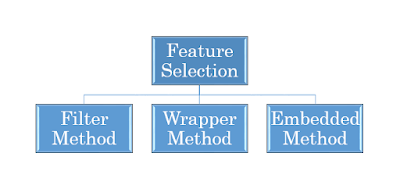

In [214]:
from IPython.display import Image

# Specify the path or URL to the image
image_path = r"E:\DS_ACADEMIC\Interview Question\ML\Feature_Engineering\1.PNG"

# Display the image
Image(filename=image_path, width=600, height=400)

## C.1) Filter method
In this method, features are filtered based on general characteristics (some metric such as correlation) of the dataset such correlation with the dependent variable. Filter method is performed without any predictive model. It is faster and usually the better approach when the number of features are huge. Avoids overfitting but sometimes may fail to select best features.

## C.2) Wrapper method
In wrapper method, the feature selection algorithm exits as a wrapper around the predictive model algorithm and uses the same model to select best features (more on this from this excellent research paper). Though computationally expensive and prone to overfitting, gives better performance.

##  C.3)Embedded method
In embedded method, feature selection process is embedded in the learning or the model building phase. It is less computationally expensive than wrapper method and less prone to overfitting.

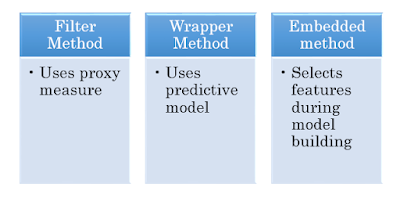

In [213]:
Image(filename=r"E:\DS_ACADEMIC\Interview Question\ML\Feature_Engineering\2.PNG", width=600, height=400)

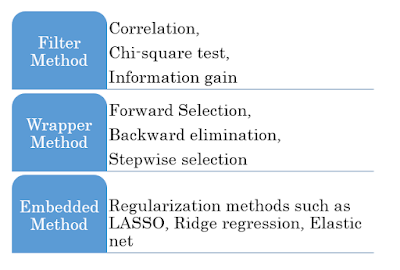

In [212]:
Image(filename=r"E:\DS_ACADEMIC\Interview Question\ML\Feature_Engineering\3.PNG", width=600, height=400)

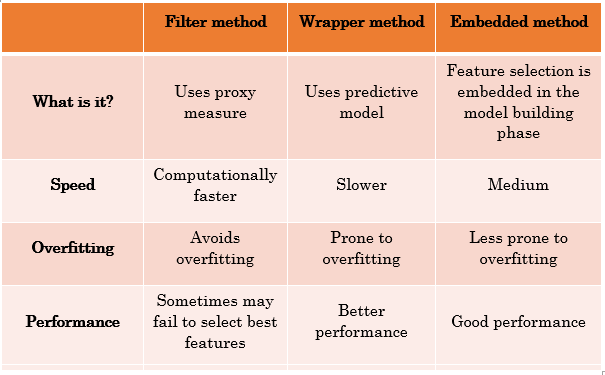

In [210]:
Image(filename=r"E:\DS_ACADEMIC\Interview Question\ML\Feature_Engineering\4.PNG", width=600, height=400)

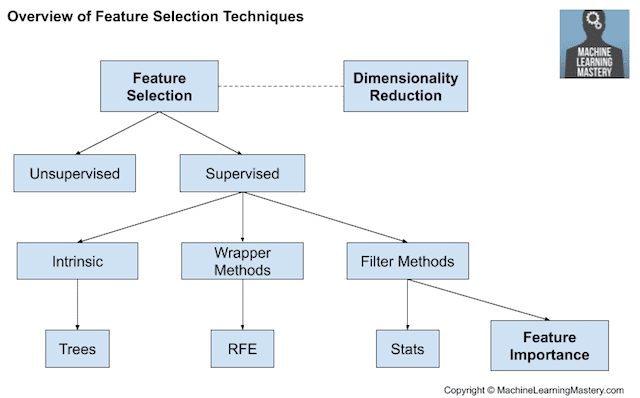

In [216]:
Image(filename=r"E:\DS_ACADEMIC\Interview Question\ML\Feature_Engineering\5.PNG", width=800, height=400)

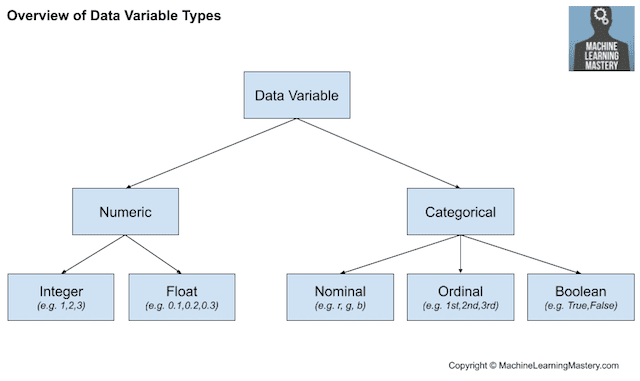

In [217]:
Image(filename=r"E:\DS_ACADEMIC\Interview Question\ML\Feature_Engineering\6.PNG", width=800, height=400)

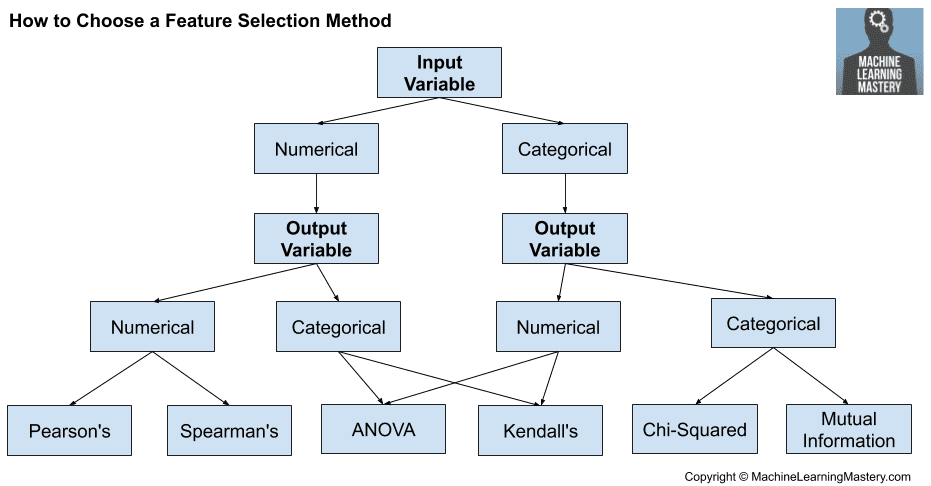

In [218]:
Image(filename=r"E:\DS_ACADEMIC\Interview Question\ML\Feature_Engineering\7.PNG", width=800, height=400)

## D) Dimensionality Reduction Techniques

## D1) Percentage Missing values
* 95% -> Discard Feature
* 50-95% -> No Imputation(Can be used as feature)
* <50% -> Imputation

## D2) Amount of Variation
* Drop or review variables that have a very low variation.
* Either Standardize all variables, or use standard deviation to account for variables with differnce scales.
* Drop varivales with zero variation (unary)

## D3) Pairwise Correlations
* Many variables are often correlated with each other , and hence are redundant.
* If two variables are highly correlated, keeping only one will help reduce dimensionality without much loss of information.
* Which variable to keep ? That one that has a higher correlation coefficient with target.

## D4) Multicolinearity
When two or mno0re variables are hoighly correlated with each other.
Dropping one or more variables should help reduce dimensionality without a substantial loss of information.
Which variable(s) to drop? Use Condition Index

## D5) PCA, LDA and t-SNE
## D5.1) PCA
PCA can be defined as the orthogonal projection of the data onto a lower dimensional linear space, known as the principal subspace, such that the variance of the projected data is maximized.

### Without using library

In [45]:
import numpy as np
from numpy.linalg  import eig

In [46]:
# Define a matrix
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [47]:
# Calculate mean of each column
M= np.mean(A.T, axis=1)
print(M)

[4. 5. 6.]


In [49]:
# Center columns by substracting column means
C=A-M
print(C)

[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]


In [50]:
# Calculate the covariance matrix for centered matrix
V=np.cov(C.T)
print(V)

[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]


In [52]:
# eigendecomposition of covariance matrix
values, vectors=eig(V)
print(values)
print(vectors)

[ 0. 27.  0.]
[[-0.81649658  0.57735027  0.        ]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.40824829  0.57735027  0.70710678]]


In [53]:
#Project data
P= vectors.T.dot(C.T)
print(P.T)

[[ 2.22044605e-16 -5.19615242e+00  4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  5.19615242e+00 -4.44089210e-16]]


Running the example first prints the original matrix, then the eigenvectors and eigenvalues of the centered covariance matrix, followed finally by the projection of the original matrix.

Interestingly, we can see that only the first eigenvector is required, suggesting that we could project our 3×3 matrix onto a 3×2 matrix with little loss.

In [59]:
# Using scikit library
from sklearn.decomposition import PCA

# Define a matrix
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

# Create the PCA instance
pca=PCA(3)

# fit on data
pca.fit(A)

# access values and vectors
print(pca.components_)
print(pca.explained_variance_)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 0.57735027  0.57735027  0.57735027]
 [-0.81649658  0.40824829  0.40824829]
 [ 0.         -0.70710678  0.70710678]]
[2.70000000e+01 6.57384088e-32 0.00000000e+00]


In [60]:
# transform data
B = pca.transform(A)
print(B)

[[-5.19615242e+00 -1.33226763e-15 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.19615242e+00  1.33226763e-15  4.44089210e-16]]


## D5.2) LDA(LinearDiscriminantAnalysis)

Accuracy after LDA: 0.20


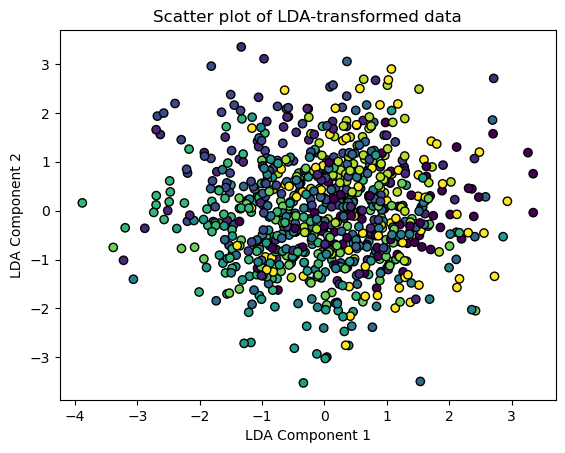

Feature Importances: [0.33992876 0.33528702 0.32478421]


In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=3)  # Specify the number of components you want
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier on the transformed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_lda)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after LDA: {accuracy:.2f}")

# Optionally, you can visualize the transformed data or feature importance
# (Note: Visualization might be challenging if the number of classes is high)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k')
plt.title('Scatter plot of LDA-transformed data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

# Feature importances if using a classifier like RandomForest
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

In [87]:
X_train_lda.shape

(800, 3)

## D5.3) t-SNE(t- distributed Stochastic Neighbor Embedding)

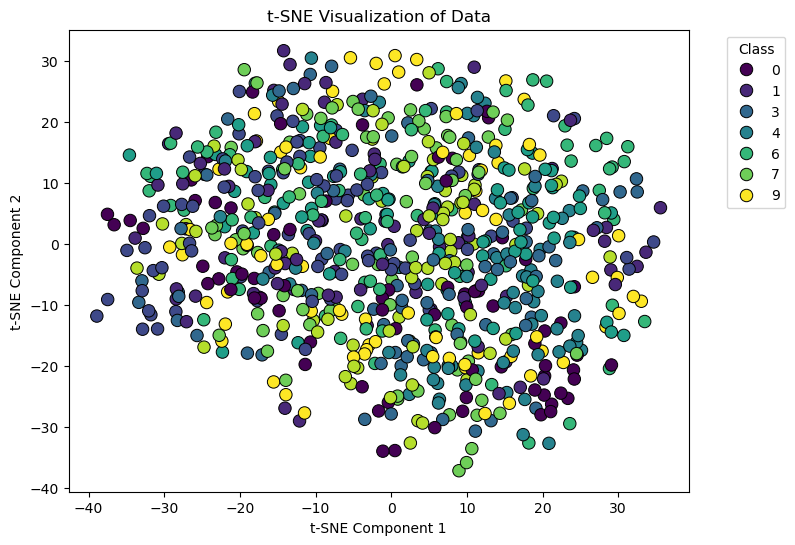

Accuracy after t-SNE: 0.12


In [83]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Visualize the t-SNE-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis', edgecolor='k', s=80)
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Train a classifier on the t-SNE-transformed data
clf_tsne = RandomForestClassifier(random_state=42)
clf_tsne.fit(X_train_tsne, y_train)

# Apply t-SNE to the test set
X_test_tsne = tsne.fit_transform(X_test)

# Make predictions on the t-SNE-transformed test set
y_pred_tsne = clf_tsne.predict(X_test_tsne)

# Evaluate the classifier
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
print(f"Accuracy after t-SNE: {accuracy_tsne:.2f}")


In [84]:
X_train_tsne.shape

(800, 3)

# Comparison
* Objective:

LDA: Maximizes the separation between classes by finding the linear combinations of features that best discriminate between classes.
PCA: Maximizes the variance of the data irrespective of class labels. It identifies the axes in the data space along which the data varies the most.
t-SNE: Focuses on preserving pairwise similarities between data points. It is particularly useful for visualizing high-dimensional data in lower dimensions.

* Supervised vs. Unsupervised:

LDA: Supervised technique that takes into account class labels during dimensionality reduction.
PCA: Unsupervised technique that doesn't consider class labels.
t-SNE: Primarily an unsupervised technique, but it can be adapted for semi-supervised learning.

* Use Cases:

LDA: Commonly used for dimensionality reduction in the context of classification tasks where class separability is crucial.
PCA: Widely used for various applications, including noise reduction, data compression, and visualization. It is not specifically designed for classification tasks.
t-SNE: Particularly useful for visualizing high-dimensional data in two or three dimensions, especially when the relationships between data points are complex.

*Preservation of Information:

LDA: Focuses on preserving the information that discriminates between classes.
PCA: Aims to preserve the total variance in the data.
t-SNE: Tries to preserve pairwise similarities between data points.

* Linearity:

LDA: Assumes linear relationships between features and class labels.
PCA: Also assumes linearity, as it is based on finding orthogonal linear transformations.
t-SNE: Non-linear method; it can capture non-linear relationships between data points.

* Interpretability:

LDA: Provides interpretable components that are linear combinations of the original features.
PCA: Provides principal components, which are linear combinations of the original features, but they may not be as interpretable as in LDA.
t-SNE: Embeds data in a new space, making interpretation challenging, but it excels in visualization.

* Computational Complexity:

LDA and PCA: Generally more computationally efficient than t-SNE, especially for large datasets.
t-SNE: Computationally expensive, particularly for large datasets, due to its pairwise comparison nature.

## D6) Cluster Anlaysis
* DR technique which emphasizes correlation/similarity.
* Identify groups of variables that are as correlated as possible among themselves and as uncorrelated as with varaible in other clusters.
* Reduces multicollinearity - and explicability is not (always) compromised.
* When to use:
    * Excessive multicollinearity.
    * Explanation of the predictors is important.

## D7) Correlation with the Target
* Drop varibles that have a very low correlation with the target.
* If a variable has a very low correction with the target, it's not going to useful for the model(prediction).

## D8-10) Forward/Backward/Stepwise Selection
* Forward Selection
    * Identify the best varible(e.g., based on model accuarcy).
    * Add the next best variable into the model.
    * And so on until some predeined criteria is satisfied.

* Backward Selection
    * Start with all variables included in model.
    * Drop the least useful variable(e.g., based on the smallest drop in model accuracy)
    * And so on until some predefined criteria is satisfied.
    
* Stepwise Selection
    * Similar to forward selection process, but a variable can also be dropped if it's deemed as not useful anymore after a certain number of steps.

## D11) LASSO (Least Absolute Shrinkage and Selection Operator)
* Variable Selection + Reglarization

## D12) Tree-based
* Forests of trees to evaluate importance of features.
* Fit a number of randomized decision tree on various sub-samples of the datsets and use averaging to rank order features.

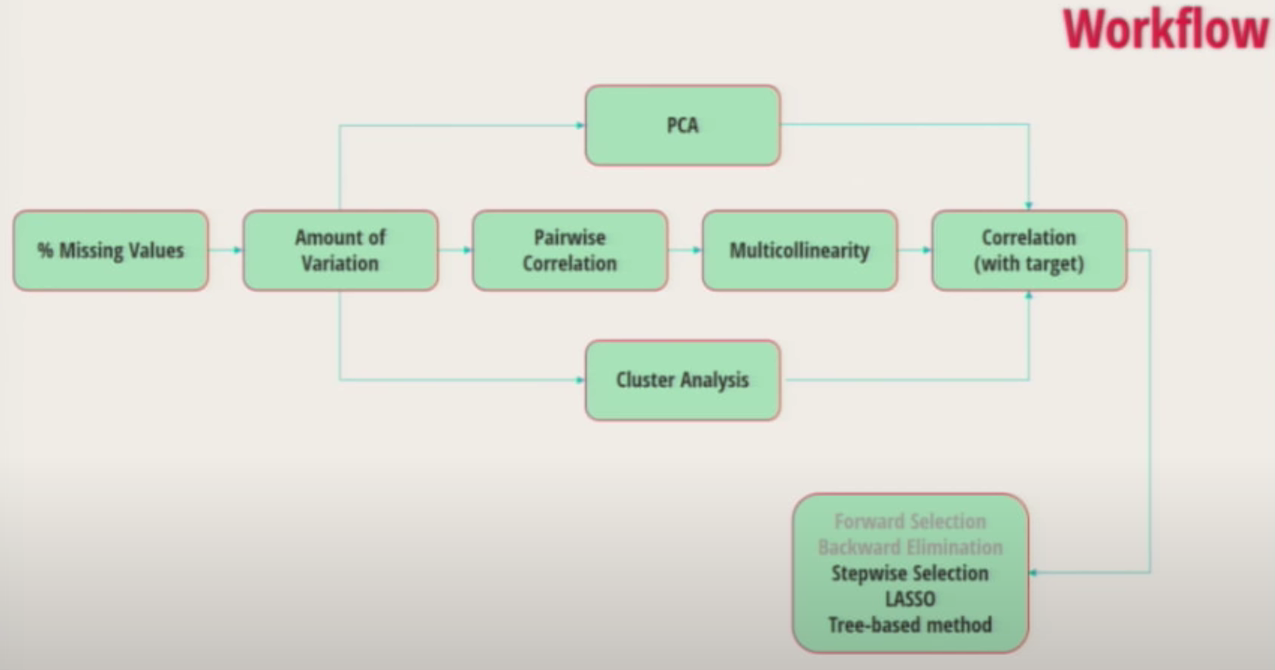

In [44]:
from IPython.display import Image
Image(filename=r'C:\Users\viren\OneDrive\Pictures\Screenshots\Screenshot 2023-12-29 004539.png', width=800, height=400)